<a href="https://colab.research.google.com/github/luiscarvalhofrade/sprint-iv-backend/blob/main/pregnancy_smoker_exploratory_luis_frade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sprint IV - Desenvolvimento de software inteligentes**

Aluno: Luis Cláudio de Carvalho Frade

Importando as bibliotecas necessárias para o correto funcionamento da análise

In [1]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

## Importando dados a serem analisados para o desenvolvimento do(s) modelo(s)

# Dados

- Os dados escolhidos são observação referente a dados de mães e filhos recem nascidos, onde buscamos entender se com os dados conseguimos identificar se uma mãe fumou ou não no período da gravidez.

- Columas:
  - BWT: peso do recém nascido em onças
  - GESTATION: número total de dias da gestação
  - PARITY: primogênito (1: sim, 0: não)
  - WEIGHT: peso da mãe em libras
  - HEIGHT: altura da mãe em pés
  - AGE: idade em anos da mãe

In [2]:
file_read = 'https://raw.githubusercontent.com/luiscarvalhofrade/sprint-iv-backend/main/babies.csv'
df = pd.read_csv(file_read)
df1 = df.copy()
df2 = df1.drop(columns='case')
df2.head()

,bwt,gestation,parity,age,height,weight,smoke
0,120,284.0,0,27.0,62.0,100.0,0.0
1,113,282.0,0,33.0,64.0,135.0,0.0
2,128,279.0,0,28.0,64.0,115.0,1.0
3,123,NaN,0,36.0,69.0,190.0,0.0
4,108,282.0,0,23.0,67.0,125.0,1.0


# Limpando e analisando a base de dados retirando os *NaN*

94% da base estava limpa de NaN, um ótimo número e podemos prosseguir com a analise e posterior criação do(s) modelo(s)

In [3]:
dataset = df2.dropna()
# Check the size reduction by dropping the null value
print('Before Dropping Null values')
print(df2.shape)
print('After Dropping Null values')
print(df2.dropna().shape)
print('Percentage of Non-Null Values')
print(df2.dropna().shape[0]/df.shape[0] *100)

Before Dropping Null values
(1236, 7)
After Dropping Null values
(1174, 7)
Percentage of Non-Null Values
94.98381877022653


# Preprocessamento dos dados a serem utilizados

- Separação entre valores de treino e de teste e definição do tamamho de cada uma
- Definição do tamanho das partições e validação cruzada com estratificação

In [4]:
test_size = 0.30 # tamanho do conjunto de teste
seed = 7 # semente aleatória

# Separação em conjuntos de treino e teste
array = dataset.values
X = array[:,0:6]
y = array[:,6]
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

# Rodando modelos de classificação

- Utilizamos os 4 modelos descritos no material do curso
  - KNN, NB, SVM e CART
  - dos modelos extraimos as médias, desvio padrão e platamos boxplot para ajudar com a analise dos modelos

- Resultado: em um primeiro momento observamos o modelo NB como com melhor resultado, porém o desvio padrão é muito grande. Devemos continuar com melhorias na análise dos dados.



KNN: 0.607773 (0.038684)
CART: 0.539627 (0.043057)
NB: 0.652924 (0.064423)
SVM: 0.605378 (0.006942)


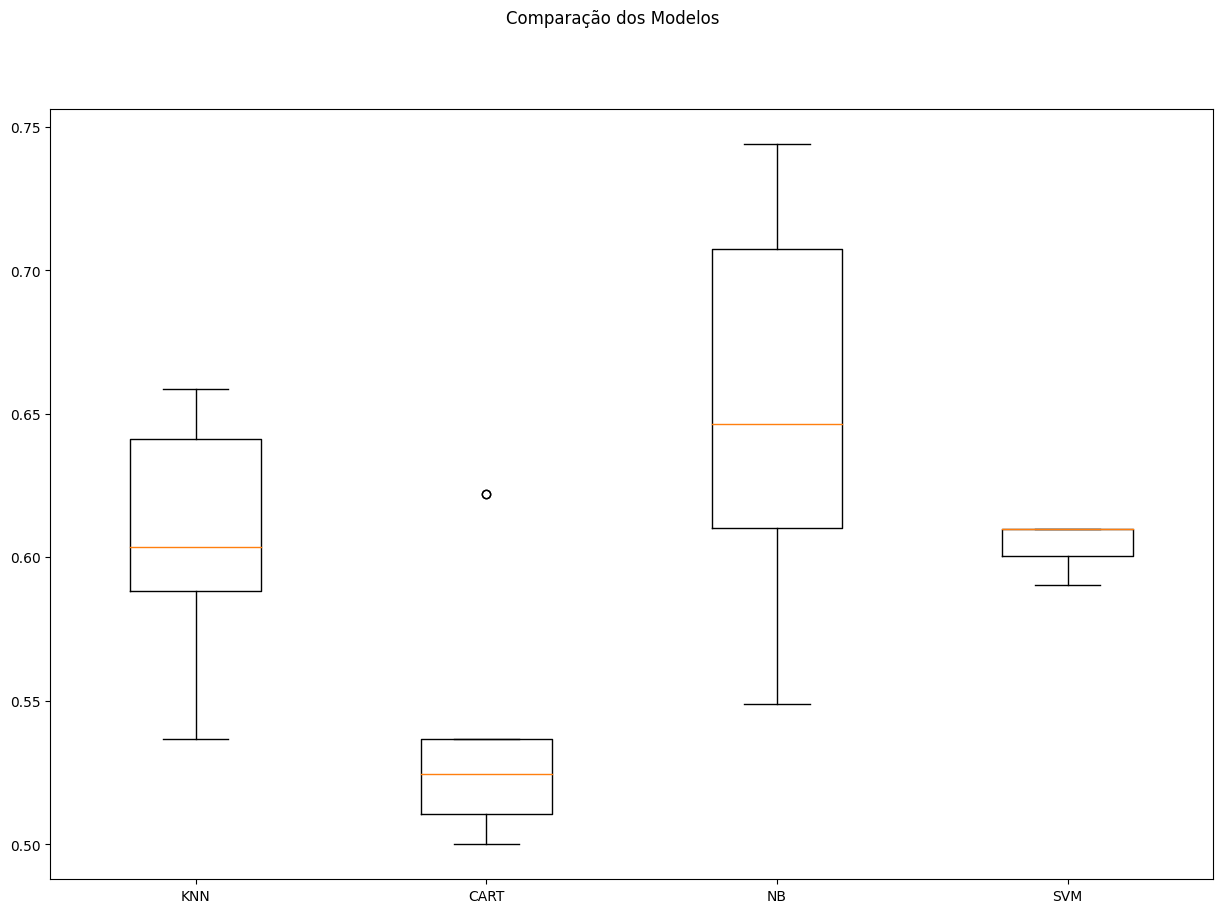

In [5]:
np.random.seed(7) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Construção das pipelines para novo conjunto de análises

- Serão utiliazados os mesmos modelos anteriores, porém vamos aplicar também a normalização e padronização (separadamente) dos dados para ver se conseguimos melhorar ainda mais o resultado.
- Ao final plotamos os resultados em boxplot para ajudar na análise
- Resultado: Observamos que os melhores resultados foram obtidos com o modelo SVM, tanto normalizado quanto o padronizado. Sendo o padronizado o melhor

KNN-orig: 0.608 (0.039)
CART-orig: 0.540 (0.043)
NB-orig: 0.653 (0.064)
SVM-orig: 0.605 (0.007)
KNN-padr: 0.590 (0.049)
CART-padr: 0.537 (0.037)
NB-padr: 0.653 (0.064)
SVM-padr: 0.668 (0.039)
KNN-norm: 0.601 (0.045)
CART-norm: 0.547 (0.047)
NB-norm: 0.653 (0.064)
SVM-norm: 0.664 (0.044)


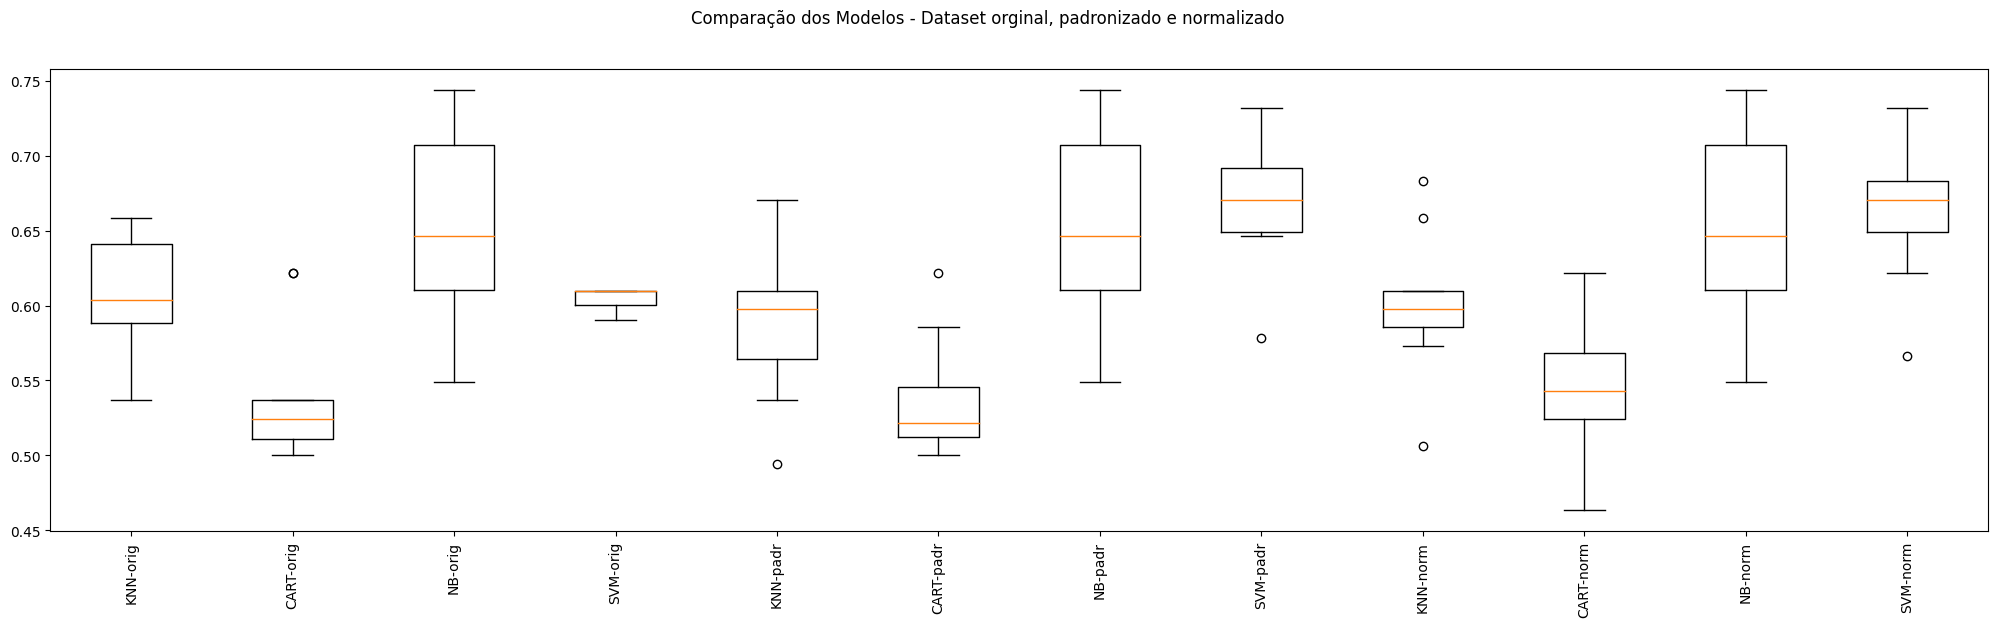

In [6]:
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))

# Dataset Padronizado
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))

# Dataset Normalizado
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

# Tuning dos modelos SVM e NB

- Vamos construir novas pipelines, mas agora vamos utilizar apenas os modelos SVM e NB
- O diferencial dessa nova análise é que vamos trabalhar com os hiperparamentros
- Vale ressaltar que o modelo NB não possui hiperparametros e normal, padronizado ou normalizado obtemos o mesmo resultado, o intuito é termos mais opções não ficarmos presos em apenas a um único modelo
- Resultado: Ao rodar o modelo observamos o que trabalhando os hiperparametros C e GAMMA do modelo SVM, conseguimos melhorar ainda mais o modelo. Sendo o modelo com os hiperparamentros 'SVM__C': 1, 'SVM__gamma': 0.1 o melhor

In [7]:
# Tuning do modelo SVM

np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
svm_model = ('SVM', SVC())
naive_bayes = ('NB', GaussianNB())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('svm-orig', Pipeline(steps=[svm_model])))
pipelines.append(('svm-padr', Pipeline(steps=[standard_scaler, svm_model])))
pipelines.append(('svm-norm', Pipeline(steps=[min_max_scaler, svm_model])))
pipelines.append(('nb-orig', Pipeline(steps=[naive_bayes])))
pipelines.append(('nb-padr', Pipeline(steps=[standard_scaler, naive_bayes])))
pipelines.append(('nb-norm', Pipeline(steps=[min_max_scaler, naive_bayes])))




# Prepara e executa o GridSearchCV
for name, model in pipelines:
    if name.startswith('svm'):
        param_grid = {'SVM__C': [0.1, 1, 10, 100], 'SVM__gamma': [0.01, 0.1, 1, 'auto']}
    else:
        param_grid = {}

    grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    # Print the best parameters and the corresponding accuracy
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))


Sem tratamento de missings: svm-orig - Melhor: 0.652860 usando {'SVM__C': 1, 'SVM__gamma': 0.01}
Sem tratamento de missings: svm-padr - Melhor: 0.667458 usando {'SVM__C': 1, 'SVM__gamma': 0.1}
Sem tratamento de missings: svm-norm - Melhor: 0.658928 usando {'SVM__C': 10, 'SVM__gamma': 'auto'}
Sem tratamento de missings: nb-orig - Melhor: 0.661360 usando {}
Sem tratamento de missings: nb-padr - Melhor: 0.661360 usando {}
Sem tratamento de missings: nb-norm - Melhor: 0.661360 usando {}


# Avaliação do modelo com o conjunto de teste para SVM

Rodando a metrica de acuracia, observamos que o modelo atinge um valor interessante acima de 0.6 (que é nosso threshold para o teste do modelo)


In [8]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
scaler = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_train) # aplicação da padronização no conjunto de treino
model = SVC(C=1, gamma=0.1)
model.fit(rescaledX, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da padronização no conjunto de teste
predictions = model.predict(rescaledTestX)
#print(accuracy_score(y_test, predictions))
print('accuracy:', accuracy_score(y_test, predictions))

accuracy: 0.6402266288951841


# Preparação do modelo

In [9]:
# Preparação do modelo com TODO o dataset
scaler = StandardScaler().fit(X) # ajuste do scaler com TODO o dataset
rescaledX = scaler.transform(X) # aplicação da padronização com TODO o dataset
model.fit(rescaledX, y)

SVC(C=1, gamma=0.1)

# Usando novos dados e fazendo a padronização dos dados

In [10]:
# Novos dados - não sabemos a classe!
data = {'bwt':  [125, 118, 134],
        'gestation': [280, 271, 285],
        'parity': [0, 1, 1],
        'age': [30, 23, 25],
        'weight': [100, 100, 100],
        'height': [69.0, 72.0, 66.0],
        }

atributos = ['bwt', 'gestation', 'parity', 'age', 'weight', 'height']
entrada = pd.DataFrame(data, columns=atributos)

array_entrada = entrada.values
X_entrada = array_entrada[:,0:7].astype(float)

# Padronização nos dados de entrada usando o scaler utilizado em X
rescaledEntradaX = scaler.transform(X_entrada)
print(rescaledEntradaX)

[[ 0.30224987  0.05615259 -0.59637086  0.47662061 14.23771645 -2.86983907]
 [-0.07982818 -0.50622492  1.67680897 -0.72708811 14.23771645 -2.7250895 ]
 [ 0.79349309  0.36858454  1.67680897 -0.38317133 14.23771645 -3.01458864]]


# Rodando o modelo com os dados anteriormente escolhidos e padronizados

In [11]:
saidas = model.predict(rescaledEntradaX)
print(saidas)

[0. 0. 0.]


# Salvando o modelo com a biblioteca pickle e gerando o arquivo 'smoker_preditor_svm.pkl' que será embarcado na solução fullstack

In [12]:
pickle_out = open('smoker_preditor_svm.pkl', 'wb')
pickle.dump(model, pickle_out)
pickle_out.close

<function BufferedWriter.close>